In [22]:
from keras.preprocessing.text import one_hot
import matplotlib.pyplot as pl

In [12]:
sent=['the glass of milk',
      'the glass of juice',
      'the cup of tea',
      'I am a good boy',
      'I am a good developer',
      'understand the meaning of bag words',
      'your videos are good']

In [13]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of bag words',
 'your videos are good']

In [14]:
voc_size=10000

In [15]:
onhot_rep=[one_hot(words,voc_size) for words in sent]

In [16]:
onhot_rep

[[8279, 6472, 7703, 1647],
 [8279, 6472, 7703, 6559],
 [8279, 555, 7703, 2197],
 [1967, 6345, 2604, 565, 9586],
 [1967, 6345, 2604, 565, 4927],
 [3156, 8279, 5723, 7703, 4331, 3012],
 [8118, 8181, 1429, 565]]

In [17]:
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

In [18]:
import numpy as np

In [21]:
sent_length=8
embedded=pad_sequences(onhot_rep,padding='pre',maxlen=sent_length)
embedded

array([[   0,    0,    0,    0, 8279, 6472, 7703, 1647],
       [   0,    0,    0,    0, 8279, 6472, 7703, 6559],
       [   0,    0,    0,    0, 8279,  555, 7703, 2197],
       [   0,    0,    0, 1967, 6345, 2604,  565, 9586],
       [   0,    0,    0, 1967, 6345, 2604,  565, 4927],
       [   0,    0, 3156, 8279, 5723, 7703, 4331, 3012],
       [   0,    0,    0,    0, 8118, 8181, 1429,  565]])

In [25]:
dim=15
model=Sequential()
model.add(Embedding(voc_size,2,input_length=sent_length))
model.compile(optimizer='adam',loss='mse')

In [27]:
a=model.predict(embedded)

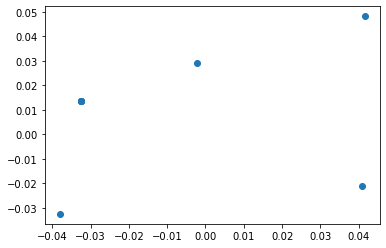

In [38]:
pl.scatter(a[0][:,0],a[0][:,1])


In [41]:
text = "‘I was a student at the University of\
Pennsylvania, but now work on\
Wall Street as a Lawyer. I have been living in\
New York for roughly five years\
now, however I am looking forward to eventually\
retiring to Texas once I have\
saved up enough money to do so.’"

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
documentA = 'the man went out for a walk'
documentB = 'the children sat around the fire'

In [47]:
bowA=documentA.split(' ')
bowB=documentB.split(' ')

In [51]:
bowA

['the', 'man', 'went', 'out', 'for', 'a', 'walk']

In [52]:
bowB

['the', 'children', 'sat', 'around', 'the', 'fire']

In [49]:
unique_w=set(bowA).union(set(bowB))

In [50]:
unique_w

{'a',
 'around',
 'children',
 'fire',
 'for',
 'man',
 'out',
 'sat',
 'the',
 'walk',
 'went'}

In [57]:
no_w_A=dict.fromkeys(unique_w,0)
for word in bowA:
    no_w_A[word]+=1
    
no_w_B=dict.fromkeys(unique_w,0)
for word in bowB:
    no_w_B[word]+=1

In [58]:
no_w_A

{'for': 1,
 'around': 0,
 'went': 1,
 'sat': 0,
 'man': 1,
 'out': 1,
 'fire': 0,
 'a': 1,
 'walk': 1,
 'the': 1,
 'children': 0}

In [59]:
no_w_B

{'for': 0,
 'around': 1,
 'went': 0,
 'sat': 1,
 'man': 0,
 'out': 0,
 'fire': 1,
 'a': 0,
 'walk': 0,
 'the': 2,
 'children': 1}